In [1]:
import nease
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

### VastDB pre-processing

In [2]:
data_folder='/home/zakaria/projects/exon_enrch/data/'
events= pd.read_table(data_folder+"VASTDB_PSI_Hsa108_hg19.tab")
annot= pd.read_table(data_folder+"events_all.tab")

In [3]:
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_colwidth', -1)
len(events)

68982

In [4]:
events.head(10)

,GENE,EVENT,COORD,LENGTH,FullCO,COMPLEX,Adipose_b,Adipose_b-Q,Adipose_c,Adipose_c-Q,Adipose_d,Adipose_d-Q,Adrenal_b,Adrenal_b-Q,Adrenal_c,Adrenal_c-Q,Amnion,Amnion-Q,Astrocytes,Astrocytes-Q,Bladder_a,Bladder_a-Q,Bone_marrow_a,Bone_marrow_a-Q,Bone_marrow_b,Bone_marrow_b-Q,Bone_marrow_c,Bone_marrow_c-Q,Brain_Endoth,Brain_Endoth-Q,Breast_Epith_a,Breast_Epith_a-Q,Breast_a,Breast_a-Q,CL_293T,CL_293T-Q,CL_Gm12878,CL_Gm12878-Q,CL_HeLa,CL_HeLa-Q,CL_K562,CL_K562-Q,CL_LP1,CL_LP1-Q,CL_MB231,CL_MB231-Q,CL_MCF7,CL_MCF7-Q,CL_PNT2,CL_PNT2-Q,Cerebellum_a,Cerebellum_a-Q,Cerebellum_c,Cerebellum_c-Q,Chorion,Chorion-Q,Colon_b,Colon_b-Q,Colon_sigmoid,Colon_sigmoid-Q,Colon_transverse,Colon_transverse-Q,Cortex,Cortex-Q,Decidua,Decidua-Q,ESC_H1_a,ESC_H1_a-Q,ESC_H1_b,ESC_H1_b-Q,ESC_H1_c,ESC_H1_c-Q,ESC_H1_d,ESC_H1_d-Q,ESC_H9_a,ESC_H9_a-Q,ESC_H9_b,ESC_H9_b-Q,Embr_Cortex_13_17wpc,Embr_Cortex_13_17wpc-Q,Embr_Forebrain_9_12wpc,Embr_Forebrain_9_12wpc-Q,Embr_Forebrain_St13_14,Embr_Forebrain_St13_14-Q,Embr_Forebrain_St17_20,Embr_Forebrain_St17_20-Q,Embr_Forebrain_St22_23,Embr_Forebrain_St22_23-Q,EndomStromCells,EndomStromCells-Q,EndothCells,EndothCells-Q,EpithelialCells,EpithelialCells-Q,Fibroblasts,Fibroblasts-Q,Frontal_Gyrus_old,Frontal_Gyrus_old-Q,Frontal_Gyrus_young,Frontal_Gyrus_young-Q,GLS_Cells,GLS_Cells-Q,HFDPC,HFDPC-Q,HMEpC_a,HMEpC_a-Q,Heart_a,Heart_a-Q,Heart_b,Heart_b-Q,Heart_c,Heart_c-Q,Kidney_b,Kidney_b-Q,Kidney_c,Kidney_c-Q,Kidney_d,Kidney_d-Q,Liver_a,Liver_a-Q,Liver_b,Liver_b-Q,Liver_c,Liver_c-Q,Lung_b,Lung_b-Q,Lung_e,Lung_e-Q,Lung_f,Lung_f-Q,Lymph_node_b,Lymph_node_b-Q,Lymph_node_c,Lymph_node_c-Q,MNC,MNC-Q,MSC,MSC-Q,Melanocytes,Melanocytes-Q,Microglia,Microglia-Q,Muscle_b,Muscle_b-Q,Muscle_d,Muscle_d-Q,Muscle_e,Muscle_e-Q,NPC_a,NPC_a-Q,NPC_b,NPC_b-Q,Neuroblastoma,Neuroblastoma-Q,Neurons,Neurons-Q,Oligodendrocytes,Oligodendrocytes-Q,Ovary_a,Ovary_a-Q,Ovary_b,Ovary_b-Q,Placenta_Epith,Placenta_Epith-Q,Placenta_a,Placenta_a-Q,Placenta_b,Placenta_b-Q,Placenta_c,Placenta_c-Q,Prostate_b,Prostate_b-Q,Prostate_c,Prostate_c-Q,Prostate_d,Prostate_d-Q,Retina_a,Retina_a-Q,Retina_macular,Retina_macular-Q,Retina_peripheral,Retina_peripheral-Q,Skin,Skin-Q,Small_intestine,Small_intestine-Q,Spleen_a,Spleen_a-Q,Spleen_b,Spleen_b-Q,Stomach_a,Stomach_a-Q,Stomach_b,Stomach_b-Q,Sup_Temporal_Gyrus,Sup_Temporal_Gyrus-Q,Testis_a,Testis_a-Q,Testis_b,Testis_b-Q,Testis_c,Testis_c-Q,Thymus_a,Thymus_a-Q,Thymus_b,Thymus_b-Q,Thyroid_b,Thyroid_b-Q,Thyroid_c,Thyroid_c-Q,Thyroid_d,Thyroid_d-Q,WBC_MNC_b,WBC_MNC_b-Q,WBC_MNC_c,WBC_MNC_c-Q,Whole_Brain_b,Whole_Brain_b-Q,iPS_a,iPS_a-Q,iPS_b,iPS_b-Q
0,A1CF,HsaALTA0000001-1/2,chr10:52573617-52573798,0,"chr10:52575766,52573617-52573822+52573798",Alt3,NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,1=1,S@0,0",80.00,"N,N,N,5=5,S@4.00,1.00",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,5=5,S@5.00,0.00",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,7=7,S@7.00,0.00",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",0.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",65.09,"SOK,SOK,SOK,106=106,S@69.00,37.00",93.33,"VLOW,VLOW,VLOW,15=15,S@14.00,1.00",88.28,"SOK,SOK,SOK,145=145,S@128.01,16.99",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",0.00,"N,N,N,1=1,S@0,0",0.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,2=2,S@2.00,0.00",NaN,"N,N,N,0=0,S@0,0",86.00,"OK,OK,OK,50=50,S@43.00,7.00",81.63,

In [5]:
events= events  [ (events['LENGTH']>=3)  &  (events['COMPLEX'].isin(['S*','S'])) ]
len(events)

20300

In [6]:
# extract the events in the following tissues
tissue={}

#muscles
tissue['Muscles']=['Heart_c' ,'Heart_a' ,'Heart_b','Muscle_b','Muscle_e']

#Embryonic Brain
#tissue['Embryonic']=['Embr_Forebrain_St13_14']

#Neural
tissue['Neural']=['Whole_Brain_b','Cortex']


#Placental
tissue['Placental']=['Placenta_a' , 'Placenta_b' , 'Placenta_c' ]

# Epithelial
tissue['Epithelial']= [ 'Skin' , 'Placenta_Epith' , 'EpithelialCells'] 


# Digestive Tract
tissue['Digestive']= [ 'Colon_b' ,'Stomach_a','Stomach_b'  ]

# Liver
tissue['liver']= ['Liver_a' , 'Liver_b' ,'Liver_c' ]

# Kidney
tissue['Kidney']=['Kidney_c','Kidney_b']

# Adipose
tissue['Adipose']= [ 'Adipose_b' , 'Adipose_c' , 'Adipose_d']


# Testis
tissue['Testis']=[ 'Testis_a', 'Testis_c']



#Immune-Hematopoietic
tissue['Immune-Hematopoietic']=['Bone_marrow_a', 'Bone_marrow_b','Lymph_node_c']

#Ovary
tissue['Ovary']=['Ovary_a','Ovary_b']


In [7]:
tissues=[]
for x in list(tissue.values()):
    tissues=tissues+x

In [8]:

events=events[['EVENT']+tissues+[ t+'-Q' for t in tissues ]]

In [9]:
events

,EVENT,Heart_c,Heart_a,Heart_b,Muscle_b,Muscle_e,Whole_Brain_b,Cortex,Placenta_a,Placenta_b,Placenta_c,Skin,Placenta_Epith,EpithelialCells,Colon_b,Stomach_a,Stomach_b,Liver_a,Liver_b,Liver_c,Kidney_c,Kidney_b,Adipose_b,Adipose_c,Adipose_d,Testis_a,Testis_c,Bone_marrow_a,Bone_marrow_b,Lymph_node_c,Ovary_a,Ovary_b,Heart_c-Q,Heart_a-Q,Heart_b-Q,Muscle_b-Q,Muscle_e-Q,Whole_Brain_b-Q,Cortex-Q,Placenta_a-Q,Placenta_b-Q,Placenta_c-Q,Skin-Q,Placenta_Epith-Q,EpithelialCells-Q,Colon_b-Q,Stomach_a-Q,Stomach_b-Q,Liver_a-Q,Liver_b-Q,Liver_c-Q,Kidney_c-Q,Kidney_b-Q,Adipose_b-Q,Adipose_c-Q,Adipose_d-Q,Testis_a-Q,Testis_c-Q,Bone_marrow_a-Q,Bone_marrow_b-Q,Lymph_node_c-Q,Ovary_a-Q,Ovary_b-Q
14382,HsaEX0000001,88.24,NaN,60.00,100.00,NaN,60.00,62.96,75.00,NaN,100.00,NaN,NaN,NaN,33.33,NaN,100.00,NaN,50.00,100.00,88.89,60.00,NaN,100.00,20.00,100.00,72.41,100.00,100.00,71.43,100.00,69.23,"N,N,N,B1,S@14.12,1.88","N,N,N,Bn,S@0,0","N,N,N,OK,S@2.40,1.60","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,OK,S@7.20,4.80","N,N,N,B1,S@13.85,8.15","N,N,N,OK,S@5.25,1.75","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0.67,1.33","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,OK,S@1.50,1.50","N,N,N,Bn,S@2.00,0.00","VLOW,VLOW,VLOW,B1,S@30.22,3.78","N,N,N,B1,S@7.20,4.80","N,N,N,Bn,S@0,0","N,N,N,Bn,S@8.00,0.00","N,N,N,Bn,S@0.60,2.40","N,N,N,OK,S@2.00,0.00","N,N,N,B2,S@18.10,6.90","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,OK,S@4.29,1.71","N,N,N,Bn,S@2.00,0.00","N,N,N,OK,S@7.62,3.38"
14383,HsaEX0000002,100.00,NaN,NaN,NaN,100.00,100.00,NaN,100.00,100.00,100.00,100.00,100.00,NaN,NaN,NaN,100.00,NaN,NaN,100.00,100.00,100.00,100.00,100.00,NaN,100.00,100.00,NaN,NaN,100.00,NaN,NaN,"N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.00,0.00","N,N,N,B1,S@7.00,0.00","N,N,N,Bn,S@0,0","VLOW,VLOW,VLOW,B1,S@31.00,0.00","N,N,N,Bn,S@8.00,0.00","N,N,N,B1,S@22.00,0.00","N,N,N,Bn,S@2.00,0.00","N,N,N,Bn,S@2.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@6.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@5.00,0.00","N,N,N,OK,S@3.00,0.00","N,N,N,B1,S@4.00,0.00","N,N,N,Bn,S@3.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0"
14384,HsaEX0000003,70.15,100.00,81.82,100.00,100.00,100.00,71.43,35.48,NaN,100.00,100.00,NaN,NaN,NaN,NaN,28.57,NaN,100.00,60.00,74.36,33.33,73.33,82.46,64.00,45.45,40.00,NaN,35.00,69.70,50.00,100.00,"VLOW,VLOW,VLOW,B2,S@39.99,17.01","N,N,N,Bn,S@7.00,0.00","N,N,N,Bn,S@8.18,1.82","N,N,N,Bn,S@11.00,0.00","N,N,N,Bn,S@4.00,0.00","N,N,N,Bn,S@6.00,0.00","N,N,N,Bn,S@4.29,1.71","VLOW,VLOW,VLOW,B2,S@7.45,13.55","N,N,N,Bn,S@0,0","N,N,N,Bn,S@3.00,0.00","N,N,N,Bn,S@3.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.57,6.43","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.00,0.00","N,N,N,Bn,S@2.40,1.60","N,N,N,B2,S@25.28,8.72","N,N,N,Bn,S@2.00,4.00","N,N,N,B2,S@19.07,6.93","VLOW,VLOW,VLOW,B2,S@85.76,18.24","N,N,N,B2,S@26.24,14.76","N,N,N,Bn,S@7.27,8.73","N,N,N,Bn,S@2.80,4.20","N,N,N,Bn,S@0,0","VLOW,VLOW,VLOW,Bn,S@9.45,17.55","N,N,N,B2,S@19.52,8.48","N,N,N,Bn,S@1.50,1.50","N,N,N,Bn,S@3.00,0.00"
14385,HsaEX0000004,NaN,NaN,NaN,NaN,NaN,20.00,42.86,75.00,NaN,100.00,NaN,100.00,NaN,64.95,81.03,76.00,91.67,82.46,91.67,91.55,51.82,33.33,NaN,100.00,NaN,NaN,NaN,100.00,100.00,100.00,60.00,"N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0.60,2.40","N,N,N,OK,S@8.57,11.43","N,N,N,OK,S@5.25,1.75","N,N,N,Bn,S@0,0","N,N,N,OK,S@2.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@9.00,0.00","N,N,N,Bn,S@0,0","SOK,SOK,SOK,OK,S@103.92,56.08","VLOW,VLOW,VLOW,B2,S@85.08,19.92","LOW,LOW,LOW,OK,S@33.44,10.56","VLOW,VLOW,VLOW,OK,S@21.08,1.92","SOK,SOK,SOK,OK,S@128.64,27.36","VLOW,VLOW,VLOW,B1,S@21.08,1.92","OK,OK,OK,B1,S@62.25,5.75","SOK,SOK,SOK,OK,S@86.54,80.46","N,N,N,Bn,S@0.67,1.33","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.00,0.00","N

In [10]:
# quality of dataset filter
psi=events
for t in tissues:
    psi=psi[(psi[t+'-Q'].str.startswith('OK')) | (psi[t+'-Q'].str.startswith('SOK')) | (psi[t+'-Q'].str.startswith('L'))]
    #psi=psi[(psi[t+'-Q'].str.startswith('OK')) | (psi[t+'-Q'].str.startswith('SOK'))]

psi=psi[['EVENT']+tissues]
len(psi)

2831

In [11]:
for t in list(tissue.keys()):

    psi[t]=psi[tissue[t]].mean(axis = 1, skipna = True) 

In [12]:
psi_tissue=psi[['EVENT']+list(tissue.keys())]

In [13]:
tissues=list(tissue.keys())

In [14]:
psi_tissue

,EVENT,Muscles,Neural,Placental,Epithelial,Digestive,liver,Kidney,Adipose,Testis,Immune-Hematopoietic,Ovary
14460,HsaEX0000112,87.404,92.055,94.700000,95.746667,97.266667,98.673333,98.280,95.410000,98.395,97.223333,90.510
14475,HsaEX0000140,0.892,1.185,2.443333,2.310000,1.240000,2.306667,2.015,1.256667,4.605,1.986667,1.565
14476,HsaEX0000143,0.088,0.000,0.120000,1.603333,0.236667,0.126667,0.465,0.690000,2.065,4.723333,0.130
14510,HsaEX0000234,82.186,98.440,98.633333,90.413333,98.896667,99.320000,88.390,87.596667,94.800,72.000000,93.490
14625,HsaEX0000543,0.480,1.705,1.516667,0.943333,20.790000,4.806667,0.575,1.186667,3.200,2.853333,3.330
...,...,...,...,...,...,...,...,...,...,...,...,...
50136,HsaEX0074508,96.390,94.030,89.600000,98.290000,98.403333,97.210000,92.655,97.450000,99.275,95.633333,96.240
50140,HsaEX0074521,0.942,0.405,0.430000,1.863333,0.573333,1.866667,1.815,1.666667,4.170,2.293333,5.200
50141,HsaEX0074523,99.246,100.000,99.120000,98.056667,100.000000,99.540000,99.840,97.283333,99.830,92.980000,99.725
50145,HsaEX0074528,59.932,46.030,49.496667,74.046667,70.750000,53.230000,51.240,60.886667,35.775,34.400000,55.620


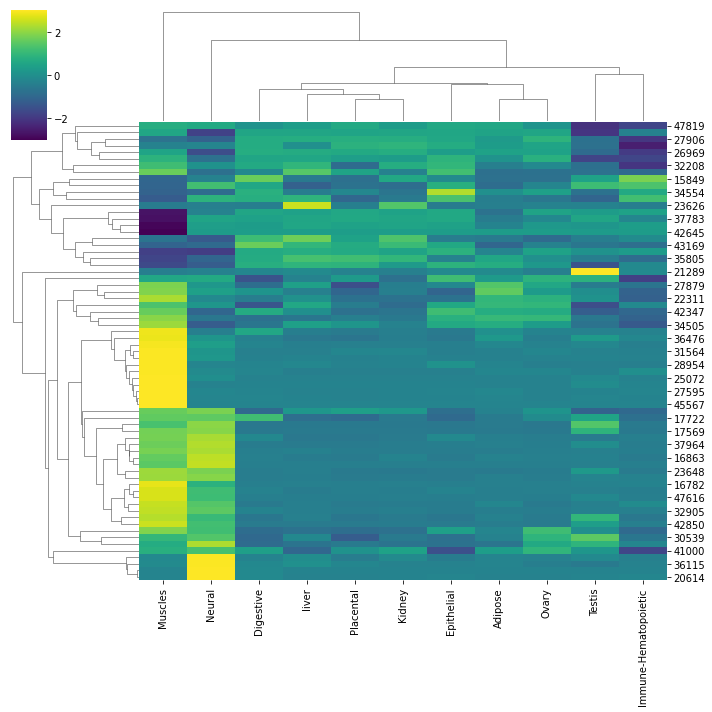

In [15]:
psi_tissue['std']=psi_tissue[tissues].std(axis = 1, skipna = True) 
psi_tissue['mean']=psi_tissue[tissues].mean(axis = 1, skipna = True) 
psi_var=psi_tissue[psi_tissue['std']>20]
g = sns.clustermap(psi_var[tissues],cmap="viridis",z_score=0)
g.savefig("AS data/vastdb/Heatmap.pdf",format='pdf' )

In [16]:
tissue_interest='Neural'
psi_tissue['Zscore']=(psi_tissue[tissue_interest] - psi_tissue['mean'])/psi_tissue['std']
psi_tissue

,EVENT,Muscles,Neural,Placental,Epithelial,Digestive,liver,Kidney,Adipose,Testis,Immune-Hematopoietic,Ovary,std,mean,Zscore
14460,HsaEX0000112,87.404,92.055,94.700000,95.746667,97.266667,98.673333,98.280,95.410000,98.395,97.223333,90.510,3.649201,95.060364,-0.823568
14475,HsaEX0000140,0.892,1.185,2.443333,2.310000,1.240000,2.306667,2.015,1.256667,4.605,1.986667,1.565,1.018868,1.982303,-0.782538
14476,HsaEX0000143,0.088,0.000,0.120000,1.603333,0.236667,0.126667,0.465,0.690000,2.065,4.723333,0.130,1.428314,0.931636,-0.652263
14510,HsaEX0000234,82.186,98.440,98.633333,90.413333,98.896667,99.320000,88.390,87.596667,94.800,72.000000,93.490,8.499150,91.287818,0.841517
14625,HsaEX0000543,0.480,1.705,1.516667,0.943333,20.790000,4.806667,0.575,1.186667,3.200,2.853333,3.330,5.806468,3.762424,-0.354333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50136,HsaEX0074508,96.390,94.030,89.600000,98.290000,98.403333,97.210000,92.655,97.450000,99.275,95.633333,96.240,2.857005,95.925152,-0.663335
50140,HsaEX0074521,0.942,0.405,0.430000,1.863333,0.573333,1.866667,1.815,1.666667,4.170,2.293333,5.200,1.527280,1.929576,-0.998229
50141,HsaEX0074523,99.246,100.000,99.120000,98.056667,100.000000,99.540000,99.840,97.283333,99.830,92.980000,99.725,2.081487,98.692818,0.628004
50145,HsaEX0074528,59.932,46.030,49.496667,74.046667,70.750000,53.230000,51.240,60.886667,35.775,34.400000,55.620,12.551420,53.764273,-0.616207


In [17]:
psi_filtred=psi_tissue[ psi_tissue['Zscore']>2]
len(psi_filtred)

110

In [18]:
psi_filtred=psi_filtred[  (psi_filtred['mean']>1) &   (psi_filtred['mean']<90) ]
psi_filtred=psi_filtred[  psi_filtred[tissue_interest]>15 ]
len(psi_filtred)

55

## Clustering and visualization

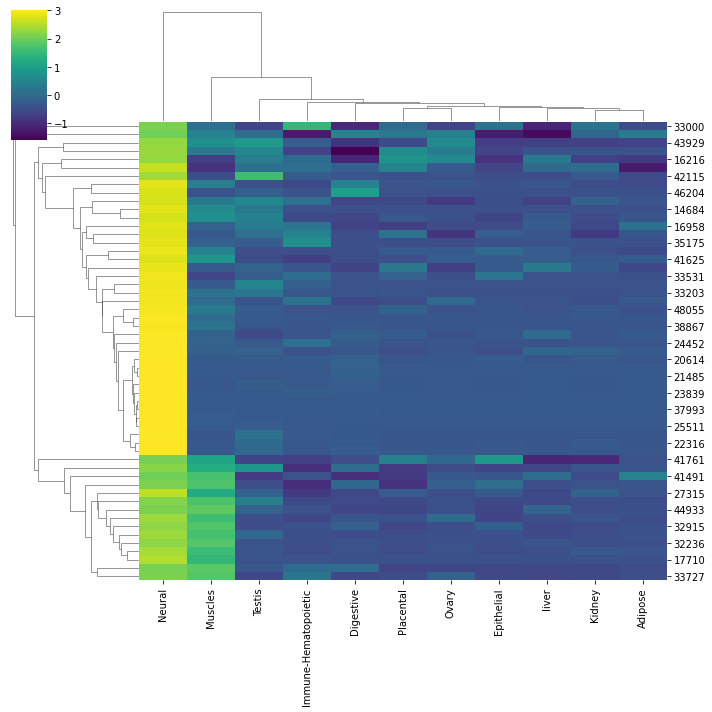

In [19]:
g = sns.clustermap(psi_filtred[tissues],cmap="viridis",z_score=0)


### Prepare the list of events in NEASE format

In [20]:
event_cord=pd.merge(annot,psi_filtred['EVENT'])    


In [21]:
event_cord['start']= event_cord['COORD_o'].apply(lambda x: x.split('-')[0].split(':')[1])
event_cord['end']= event_cord['COORD_o'].apply(lambda x: x.split('-')[1])
#event_cord=event_cord[['GENE','start','end']]

In [22]:
# convert gene names to gene IDs using nease functions
convert_help=nease.functions.database_mapping['Human'][['Gene name','Gene stable ID']]
input=pd.merge(event_cord,convert_help,left_on='GENE',right_on='Gene name')
input=input[['Gene stable ID','start','end']].drop_duplicates()
input.head(10)

,Gene stable ID,start,end
0,ENSG00000023330,52198672,52198848
41,ENSG00000033627,42508572,42508589
187,ENSG00000066855,65689566,65689599
199,ENSG00000070961,89598657,89598743
282,ENSG00000075711,197068502,197068537
1243,ENSG00000075945,169925787,169925855
1310,ENSG00000263001,74714860,74714916
1407,ENSG00000080822,98521653,98521696
1480,ENSG00000084234,130137256,130137291
1559,ENSG00000087274,2926642,2926675


## NEASE analysis


In [23]:
# Run nease with standard input.
events=nease.run(input, organism='Human')

Delta PSI column was not found. Proceeding with all events (no filtering)

		Data Summary
**************************************************
15 protein domains are affected by AS.
9 of the affected domains have known interactions.
41 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
NEASE enrichment done.


In [24]:
# Run on Reactome and KEGG gene set
enr=events.classic_enrich(gseapy_databases=['Reactome_2016'])
enr.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,Membrane Trafficking Homo sapiens R-HSA-199991,10/420,7.272580e-08,0.000018,0,0,11.914634,195.835714,SEC24B;EXOC7;DCTN4;PPP6R3;CLTB;VTI1A;CLTA;KIFAP3;SEC24C;RAB3GAP1
1,Reactome_2016,MHC class II antigen presentation Homo sapiens R-HSA-2132295,6/103,2.129644e-07,0.000026,0,0,27.909560,428.750580,SEC24B;DCTN4;CLTA;AP2A1;KIFAP3;SEC24C
2,Reactome_2016,Vesicle-mediated transport Homo sapiens R-HSA-5653656,10/492,3.148278e-07,0.000026,0,0,10.097510,151.172252,SEC24B;EXOC7;DCTN4;PPP6R3;CLTB;VTI1A;CLTA;KIFAP3;SEC24C;RAB3GAP1
3,Reactome_2016,"WNT5A-dependent internalization of FZD2, FZD5 and ROR2 Homo sapiens R-HSA-5140745",3/13,4.131015e-06,0.000253,0,0,127.276596,1577.846344,CLTB;CLTA;AP2A1
4,Reactome_2016,WNT5A-dependent internalization of FZD4 Homo sapiens R-HSA-5099900,3/15,6.548974e-06,0.000321,0,0,106.053191,1265.872335,CLTB;CLTA;AP2A1
5,Reactome_2016,Beta-catenin independent WNT signaling Homo sapiens R-HSA-3858494,5/144,2.945995e-05,0.001203,0,0,15.836131,165.210104,PPP3CA;CLTB;CLTA;SCRIB;AP2A1
6,Reactome_2016,Axon guidance Homo sapiens R-HSA-422475,8/515,3.795755e-05,0.001262,0,0,7.304593,74.353758,DLG1;PTPRA;CLTB;CLTA;AP2A1;IQGAP1;ARHGEF7;CAMK2G
7,Reactome_2016,EGFR downregulation Homo sapiens R-HSA-182971,3/27,4.122055e-05,0.001262,0,0,52.994681,535.064695,CLTA;AP2A1;ARHGEF7
8,Reactome_2016,Trafficking of AMPA receptors Homo sapiens R-HSA-399719,3/31,6.290143e-05,0.001541,0,0,45.414894,439.341029,DLG1;AP2A1;CAMK2G
9,Reactome_2016,"Glutamate Binding, Activation of AMPA Receptors and Synaptic Plasticity Homo sapiens R-HSA-399721",3/31,6.290143e-05,0.001541,0,0,45.414894,439.341029,DLG1;AP2A1;CAMK2G


In [25]:
enr=events.classic_enrich(gseapy_databases=['KEGG_2019_Human'])
enr

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Human,Endocrine and other factor-regulated calcium reabsorption,4/48,0.000006,0.000546,0,0,39.339921,471.721761,CLTB;CLTA;AP2A1;ATP2B1
1,KEGG_2019_Human,Synaptic vesicle cycle,4/78,0.000043,0.001893,0,0,23.356052,234.820778,CLTB;CLTA;AP2A1;ATP6V0A1
2,KEGG_2019_Human,cGMP-PKG signaling pathway,4/166,0.000783,0.022965,0,0,10.621578,75.970849,PPP3CA;ATP2B1;MEF2D;GTF2I
3,KEGG_2019_Human,Huntington disease,4/193,0.001369,0.030109,0,0,9.091787,59.950882,DCTN4;CLTB;CLTA;AP2A1
4,KEGG_2019_Human,Endocytosis,4/244,0.003206,0.052856,0,0,7.141304,41.009761,SH3GLB1;CLTB;CLTA;AP2A1
...,...,...,...,...,...,...,...,...,...,...
83,KEGG_2019_Human,Human cytomegalovirus infection,1/225,0.432426,0.453018,0,0,1.797194,1.506665,PPP3CA
84,KEGG_2019_Human,Thermogenesis,1/231,0.440984,0.456548,0,0,1.749778,1.432626,SMARCC2
85,KEGG_2019_Human,MAPK signaling pathway,1/295,0.524748,0.536951,0,0,1.364431,0.879836,PPP3CA
86,KEGG_2019_Human,Olfactory transduction,1/444,0.674989,0.682748,0,0,0.898650,0.353222,CAMK2G


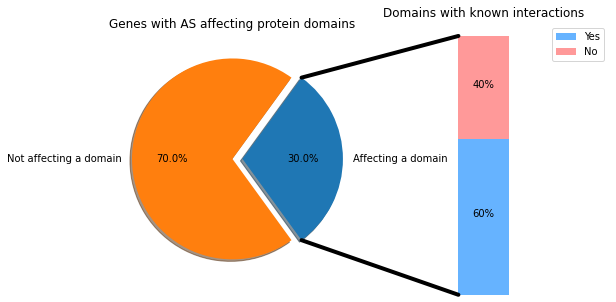

In [26]:
events.get_stats('AS data/vastdb/')

In [27]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

events.get_edges().head(10)

,Gene name,NCBI gene ID,dPSI,Pfam ID,Number of affected interactions,Affected binding,Affected binding (NCBI)
0,HERC4,26091,-,PF00632,10,"RAD23A,UBE2J2,USP5,UBE2L3,UBE2D2,UBE2E3,HERC6,HERC4,BAG3,UBC","5886,118424,8078,7332,7322,10477,55008,26091,9531,7316"
1,ATP6V0A1,535,-,PF01496,7,"ATP6V1B1,ATP6V0A2,ATP6V0D2,ATP6V1E1,ATP6V0E1,ATP6V0D1,ATP6V1D","525,23545,245972,529,8992,9114,51382"
2,CLTB,1212,-,PF01086,6,"HIP1,HIP1R,CLTC,CLTCL1,PICALM,VPS41","3092,9026,8218,1213,8301,27072"
3,DNM1L,10059,-,PF00350,5,"DNM1L,MYH11,DDX21,DDX39B,EIF4A3","10059,4629,9188,7919,9775"
4,SH3GLB1,51100,-,PF03114,4,"ARHGAP17,SH3GL1,SH3GLB2,SH3GLB1","55114,6455,56904,51100"
5,ABI2,10152,-,PF07815,4,"NCKAP1L,CYFIP2,NCKAP1,CYFIP1","3071,26999,10787,23191"
6,CLTA,1211,-,PF01086,3,"PICALM,CLTC,CLTCL1","8301,1213,8218"
7,ATP2B1,490,-,PF12424,1,CALM1,801
8,NPTN,27020,-,PF13927,1,BSG,682


### NEASE enrichment


In [28]:
nease_enr=events.enrich(database=['KEGG'])
nease_enr.head(25)

NEASE enrichment for the pathway databases:
 ['KEGG']
Found 11 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,path:hsa04721,Synaptic vesicle cycle - Homo sapiens (human),KEGG,"ATP6V0A1 (7), CLTA (2), CLTB (2)",1.123717e-16,3.607131e-14,63.609081
1,path:hsa04142,Lysosome - Homo sapiens (human),KEGG,"ATP6V0A1 (3), CLTA (2), CLTB (2)",1.012391e-10,1.083258e-08,39.860614
2,path:hsa04966,Collecting duct acid secretion - Homo sapiens (human),KEGG,ATP6V0A1 (7),2.754040e-13,4.420235e-11,28.920537
3,path:hsa00190,Oxidative phosphorylation - Homo sapiens (human),KEGG,ATP6V0A1 (7),7.885035e-10,6.327740e-08,20.960884
4,path:hsa05323,Rheumatoid arthritis - Homo sapiens (human),KEGG,ATP6V0A1 (7),1.230989e-09,7.902951e-08,20.515448
5,path:hsa05110,Vibrio cholerae infection - Homo sapiens (human),KEGG,ATP6V0A1 (7),1.702350e-08,9.107570e-07,17.888671
6,path:hsa04145,Phagosome - Homo sapiens (human),KEGG,ATP6V0A1 (7),1.473394e-06,6.756562e-05,13.427942
7,path:hsa04961,Endocrine and other factor-regulated calcium reabsorption - Homo sapiens (human),KEGG,"CLTA (2), CLTB (2)",2.675422e-04,9.542339e-03,11.633650
8,path:hsa04144,Endocytosis - Homo sapiens (human),KEGG,"SH3GLB1 (3), CLTA (2), CLTB (2)",1.663640e-03,4.854803e-02,11.082956
9,path:hsa05120,Epithelial cell signaling in Helicobacter pylori infection - Homo sapiens (human),KEGG,ATP6V0A1 (7),3.463786e-05,1.389844e-03,10.270563


### Compare the classic gene enrichment with NEASE



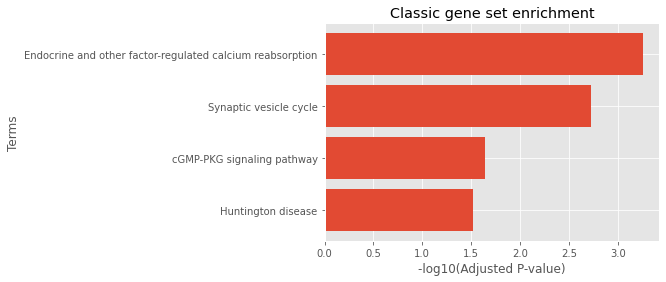

In [29]:
import numpy as np
import matplotlib.pyplot as plt

Term = enr['Term'][:4]
Pvalues =enr['Adjusted P-value'][:4]
Pvalues=[ -np.log10(x) for x in Pvalues]
plt.style.use('ggplot')

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('Classic gene set enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('AS data/vastdb/classic_enr',format='pdf',bbox_inches='tight')

plt.show()

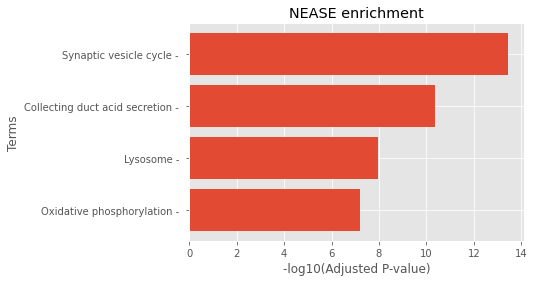

In [30]:
nease_enr=nease_enr.sort_values(by='adj p_value')
Term = nease_enr['Pathway name'][:4]
Pvalues =nease_enr['adj p_value'][:4]
Pvalues=[ -np.log10(x) for x in Pvalues]
Term = [x.split('Homo')[0] for x in Term]

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('NEASE enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('AS data/vastdb/nease_enr',format='pdf',bbox_inches='tight')
plt.show()

### Pathway specific analysis

In [31]:
events.path_analysis('path:hsa04721')

Enrichment of the pathway: Synaptic vesicle cycle - Homo sapiens (human).

Overall p_value:  1.1237166764646084e-16




,Spliced genes,NCBI gene ID,Gene knwon to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,ATP6V0A1,535,True,7/7,7.144288e-17,"ATP6V1B1,ATP6V0A2,ATP6V0D2,ATP6V1E1,ATP6V0E1,ATP6V0D1,ATP6V1D","525,23545,245972,529,8992,9114,51382"
1,CLTA,1211,True,2/3,7.356981e-05,"CLTC,CLTCL1","1213,8218"
2,CLTB,1212,True,2/6,3.642251e-04,"CLTC,CLTCL1","1213,8218"


In [45]:
events.Vis_path('path:hsa04721',file='AS data/vastdb/', k=0.9)

Enrichment of the pathway: Synaptic vesicle cycle - Homo sapiens (human).

Overall p_value:  1.1237166764646084e-16


Visualization of the pathway generated in: AS data/vastdb/Synaptic vesicle cycle - Homo sapiens (human).html
